# Load the dataset

In [1]:
import pandas as pd
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('data/NiV_Data.csv')

# Apply formatting for other columns
df = df.round({col: 2 for col in df.columns if col not in ['Year', 'Infected', 'Death', 'Avg_Population', 'Avg_Urban', 'Avg_Rural']})

df.set_index('Year')

,Population,Urban Population %,Density (P/Km²),Urban Population,Rural Population,Max T,Min T,Rainfall,Precipitation,Humidity,Dry-Bulb T,Infected,Death
Year,,,,,,,,,,,,,
2001,136578600,23,1049,32505706,104072893,33.24,18.28,139.92,2198.86,73.42,25.94,16,11
2002,138612896,24,1065,33960159,104652737,33.44,17.68,156.25,2127.61,73.17,25.82,0,0
2003,140647193,25,1080,35443092,105204100,33.52,18.08,141.08,2159.30,73.67,25.75,15,10
2004,142681489,25,1096,36954505,105726983,33.55,18.02,195.58,2112.04,72.67,25.88,65,48
2005,144715786,26,1112,38494399,106221386,33.67,18.73,219.75,2092.13,72.83,26.24,17,16
2006,146213025,27,1123,40033126,106179898,34.62,18.65,159.92,2205.12,71.42,26.47,0,0
2007,147710264,28,1134,41595210,106115053,33.90,18.29,240.42,2246.41,73.17,25.71,18,9
2008,149207503,28,1146,43180651,106026851,33.67,18.34,184.75,2384.65,73.42,25.88,11,7
2009,150704742,29,1157,44789449,105915292,34.66,18.68,160.92,2155.83,70.25,26.52,7,2


# Geographical HeatMap of the dataset

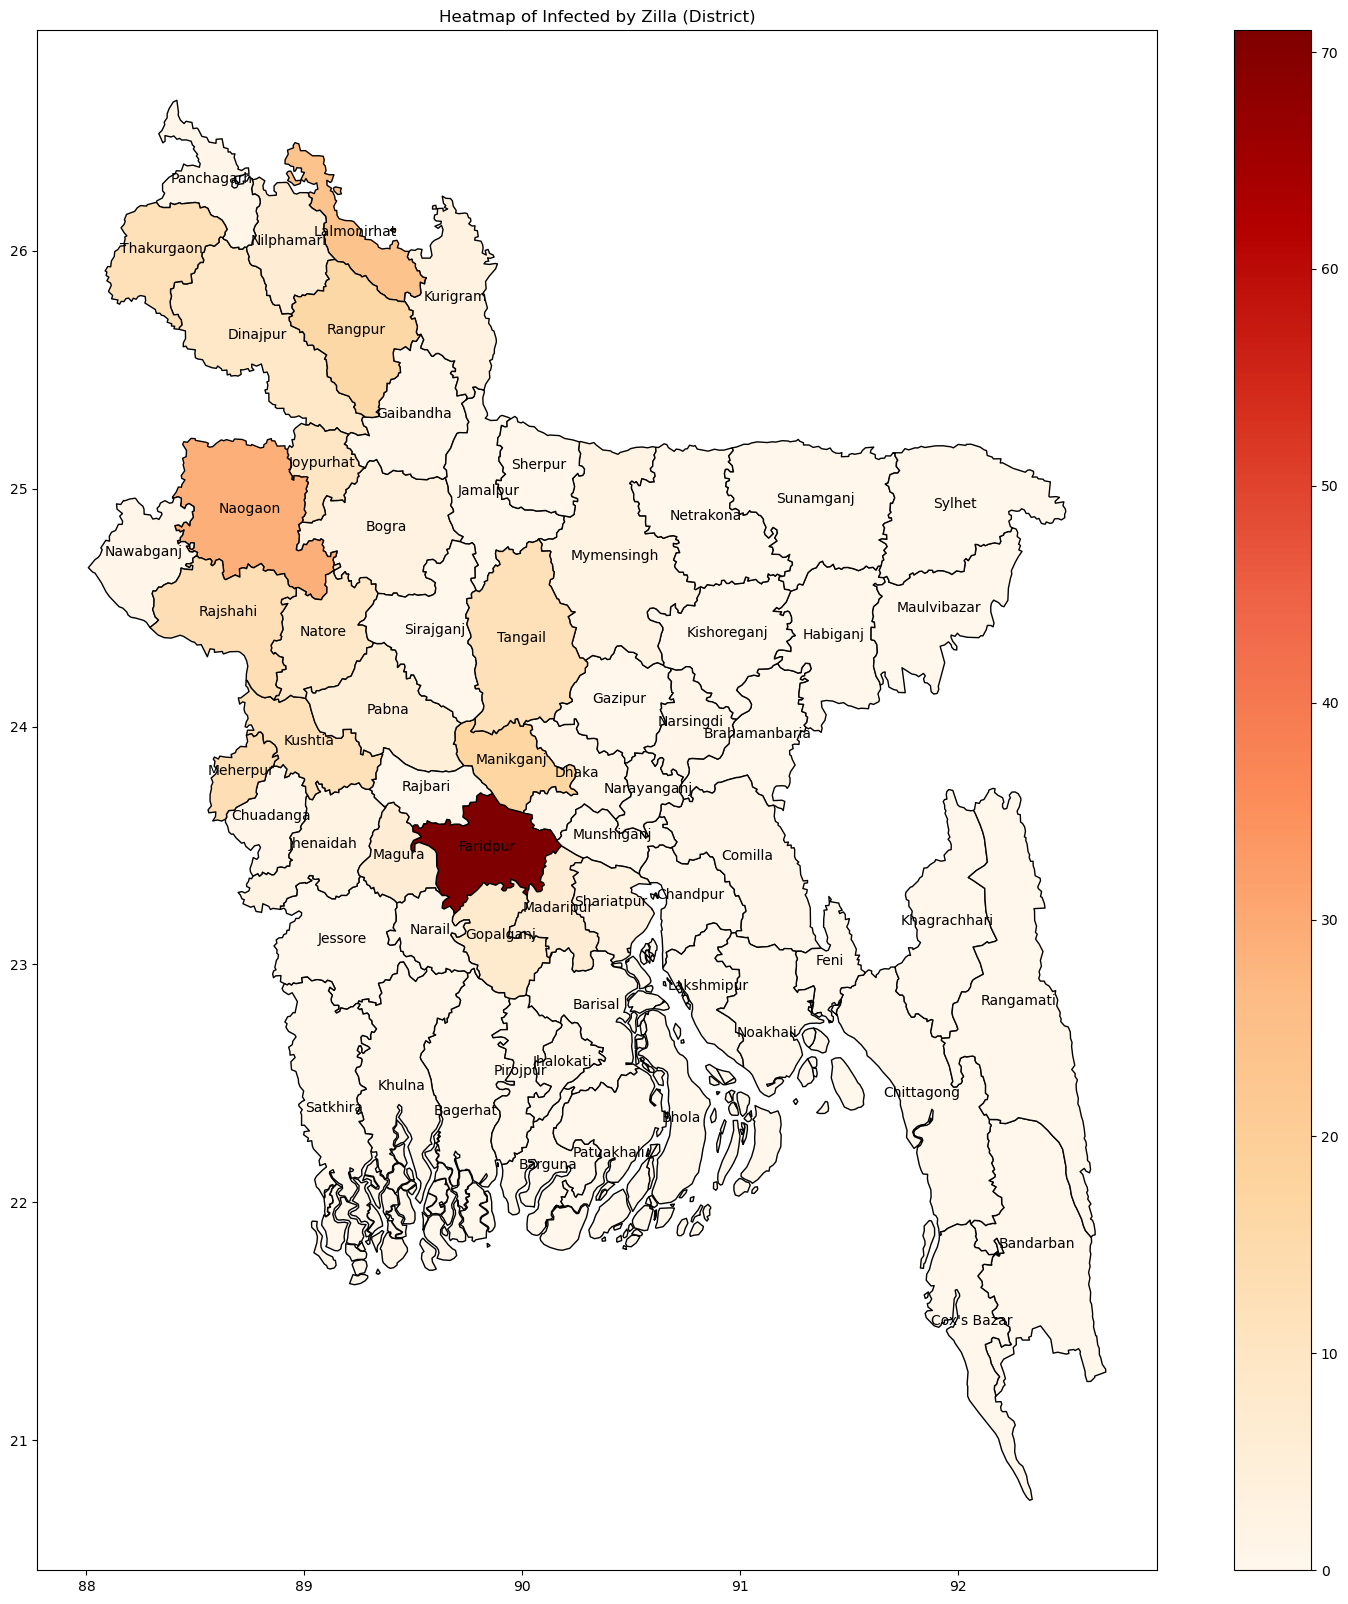

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt

districts_zillas = gpd.read_file(
    "./geodata/small_bangladesh_geojson_adm2_64_districts_zillas.json"
)

districts = [
    "Nawabganj",
    "Panchagarh",
    "Thakurgaon",
    "Nilphamari",
    "Dinajpur",
    "Lalmonirhat",
    "Kurigram",
    "Rangpur",
    "Gaibandha",
    "Joypurhat",
    "Naogaon",
    "Rajshahi",
    "Bogra",
    "Natore",
    "Mymensingh",
    "Tangail",
    "Meherpur",
    "Kushtia",
    "Pabna",
    "Manikganj",
    "Dhaka",
    "Chuadanga",
    "Jhenaidah",
    "Magura",
    "Faridpur",
    "Narsingdi",
    "Comilla",
    "Narail",
    "Gopalganj",
    "Madaripur",
    "Shariatpur",
    "Khulna",
    "Jhalokati",
]

infected = [
    1,
    1,
    12,
    6,
    9,
    24,
    3,
    16,
    1,
    10,
    29,
    13,
    3,
    9,
    2,
    12,
    13,
    12,
    5,
    17,
    1,
    1,
    2,
    6,
    71,
    1,
    1,
    1,
    8,
    6,
    3,
    1,
    1,
]

district_names = districts_zillas.ADM2_EN
d = {k: v for (k, v) in zip(districts, infected)}

infected = []
for name in district_names:
    if name in districts:
        infected.append(d[name])
    else:
        infected.append(0)

districts_zillas["Infected"] = infected

fig, ax = plt.subplots(figsize=(20, 20))
ax = districts_zillas.plot(
    ax=ax, edgecolor="black", column="Infected", markersize=10, legend=True, cmap="OrRd"
)

districts_zillas.apply(
    lambda x: ax.annotate(
        text=x.ADM2_EN, xy=x.geometry.centroid.coords[0], ha="center"
    ),
    axis=1,
)
ax.set_title("Heatmap of Infected by Zilla (District)")
plt.show()

# Descriptive Analysis

In [3]:
from matplotlib import pyplot as plt

# Convert the appropriate columns to numeric types, if necessary
numeric_columns = ['Max T', 'Min T', 'Rainfall', 'Humidity', 'Dry-Bulb T', 'Infected', 'Death', 'Avg_Precipitation', 'Avg_Population', 'Avg_Urban', 'Avg_Rural']
existing_columns = [col for col in numeric_columns if col in df.columns]
df[existing_columns] = df[existing_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values, if any
data = df.dropna()

# Handle missing values by filling with the median
data = df.fillna(df.median())

# Drop the year column
data_summary = data.drop(columns=['Year']).describe(include='all').round(decimals=2)

# Display the stats
data_summary

,Population,Urban Population %,Density (P/Km²),Urban Population,Rural Population,Max T,Min T,Rainfall,Precipitation,Humidity,Dry-Bulb T,Infected,Death
count,2.400000e+01,24.00,24.00,24.00,2.400000e+01,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00
mean,1.554893e+08,32.29,1194.21,51505153.21,1.039841e+08,34.24,19.12,170.21,2201.93,71.90,26.51,14.83,10.46
std,1.075121e+07,5.83,82.57,12439755.89,1.983911e+06,1.07,1.66,55.53,106.51,2.23,1.05,15.67,11.91
min,1.365786e+08,23.00,1049.00,32505706.00,1.006146e+08,32.78,17.68,110.75,1971.07,64.00,25.71,0.00,0.00
25%,1.473360e+08,27.75,1131.25,41204689.00,1.024296e+08,33.63,18.38,137.36,2127.59,70.69,25.92,3.00,2.00
50%,1.557926e+08,32.50,1196.50,50791397.00,1.045594e+08,34.19,18.66,156.17,2192.67,72.54,26.24,11.00,8.00
75%,1.638778e+08,37.25,1258.75,61448221.00,1.057403e+08,34.63,19.16,187.46,2284.23,73.23,26.54,18.00,13.75
max,1.735624e+08,42.00,1333.00,72896192.00,1.062214e+08,38.33,26.11,350.00,2384.65,75.00,30.00,65.00,48.00


### **1. Temperature (Max T, Min T)**
- **Max T**:
  - Mean: 34.24°C (standard deviation: 1.07°C).
  - The range (min 32.78°C to max 38.33°C) indicates relatively stable maximum temperatures across the years, with a slight variability.
  - The 75th percentile is 34.63°C, showing that most years had max temperatures close to the mean, with only a few exceptions reaching higher values.

- **Min T**:
  - Mean: 19.12°C (standard deviation: 1.66°C).
  - The range (min 17.68°C to max 26.11°C) shows more variability in the minimum temperatures, especially with the maximum value being quite higher than the mean. This could indicate some years with unusually warmer conditions.

**Key Observation**:
- The relatively low variability in both Max and Min temperatures suggests that the climate in Bangladesh remains quite consistent year over year.

---

### **2. Rainfall**
- **Mean**: 170.21 mm (standard deviation: 55.53 mm).
- The minimum is 110.75 mm, and the maximum is 350 mm, showing considerable variability in rainfall across the years.
- The 75th percentile value is 187.45 mm, indicating that in 25% of the years, rainfall exceeded this amount.

**Key Observation**:
- The variation in rainfall could significantly impact the Nipah virus transmission, as viral spread is often influenced by seasonal conditions like rain, which could increase contact between humans and virus reservoirs (e.g., fruit bats).

---

### **3. Humidity**
- **Mean**: 71.9% (standard deviation: 2.22%).
- The range is from 64% to 75%, suggesting relatively consistent humidity levels across the years.

**Key Observation**:
- Given the importance of humidity in viral survival and spread, these stable humidity levels might provide an environment conducive to NiV persistence year over year.

---

### **4. Dry-Bulb Temperature**
- **Mean**: 26.51°C (standard deviation: 1.05°C).
- The dry-bulb temperature is consistently close to the mean, ranging from 25.71°C to 30°C.

**Key Observation**:
- This consistency suggests a stable climatic condition, which could make the analysis of its impact on infection rates more reliable.

---

### **5. Infections (Infected)**
- **Mean**: 14.83 infections per year (standard deviation: 15.67 infections).
- The wide range (0 to 65 infections) shows that some years had significantly higher infection rates, potentially corresponding to outbreaks, while some had none.

**Key Observation**:
- The high standard deviation suggests that infection rates are highly variable, with certain years experiencing notable outbreaks while others have low or no cases. This could be linked to climate changes or other external factors.

---

### **6. Deaths**
- **Mean**: 10.46 deaths per year (standard deviation: 11.91 deaths).
- Similar to infections, the number of deaths shows a large range, from 0 to 48 deaths.

**Key Observation**:
- The large fluctuations in death rates may be correlated with the years of higher infection rates, suggesting more severe outbreaks in specific years.

---

### **7. Average Precipitation**
- **Mean**: 2201.93 mm (standard deviation: 106.51 mm).
- Precipitation values are somewhat consistent over the years, with a minimum of 1971.07 mm and a maximum of 2384.65 mm.

**Key Observation**:
- The relatively stable average precipitation could indicate that while annual precipitation is high, it's not a major driver of infection variability.

---

### **8. Population (Avg_Population, Avg_Urban, Avg_Rural)**
- **Avg_Population**:
  - Mean: 197.73 million (standard deviation: 16.97 million).
  - The range (171.20 million to 224.42 million) reflects the population growth over the years.

- **Avg_Urban**:
  - Mean: 78.42 million (standard deviation: 11.11 million).
  - The range (61.80 million to 98.46 million) highlights a gradual increase in the urban population over time.

- **Avg_Rural**:
  - Mean: 119.39 million (standard deviation: 7.10 million).
  - The range (103.20 million to 125.97 million) reflects a stable, slowly declining rural population.

**Key Observation**:
- The steady increase in urban population and slow decline in rural population suggest urbanization is ongoing in Bangladesh. This shift may impact the spread of the Nipah virus, as dense urban populations can facilitate faster viral transmission.

---

### **9. Population Density (Avg_Density)**
- **Mean**: 377.9 people per square kilometer (standard deviation: 304.55).
- The high variability in population density (from 231.31 to 1176.75) reflects the significant changes in population distribution over time.

**Key Observation**:
- Population density is a crucial factor for viral transmission, and the increasing density could explain some of the fluctuations in infection rates, particularly in years with higher densities.

---

### **Overall Insights:**
1. **Infection and death rates** are highly variable, which suggests that outbreaks are episodic and might be influenced by external factors like climate and population density.
2. **Temperature and humidity** are relatively stable across the years, which means the changes in infections and deaths are less likely to be driven by these factors directly.
3. **Rainfall** shows significant variability, which could correlate with spikes in infections during certain years (e.g., wetter years).
4. **Population dynamics**—especially increasing urbanization and density—might contribute to changing patterns of viral transmission, as larger and denser urban populations are more susceptible to outbreaks.

# Mean and Standard Deviation of Key Numeric Variables

In [12]:
# Visualize the mean and standard deviation of key numeric variables
stats = data_summary.loc[['mean', 'std'], numeric_columns]
stats.T.plot(kind='bar', figsize=(12, 7))
plt.title('Mean and Standard Deviation of Key Variables (2001-2024)')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.grid(True)
plt.show()

# Check the skewness of the data
skewness = data[numeric_columns].skew()
print("Skewness of the data:")
skewness_df = skewness.reset_index()
skewness_df.columns = ['Variable', 'Skewness']
skewness_df.set_index('Variable')

KeyError: "['Avg_Precipitation', 'Avg_Population', 'Avg_Urban', 'Avg_Rural'] not in index"

# Skewness Analysis

Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. Here’s what the skewness values tell us about our data:

- **Max T (2.418744)**: Positively skewed, indicating a longer tail on the right side of the distribution.
- **Min T (3.545763)**: Highly positively skewed, indicating a significantly longer tail on the right side.
- **Rainfall (1.677042)**: Positively skewed, indicating a longer tail on the right side.
- **Humidity (-1.894642)**: Negatively skewed, indicating a longer tail on the left side of the distribution.
- **Dry-Bulb T (2.679023)**: Positively skewed, indicating a longer tail on the right side.
- **Infected (1.795158)**: Positively skewed, indicating a longer tail on the right side.
- **Death (1.878533)**: Positively skewed, indicating a longer tail on the right side.
- **Avg_Precipitation (-0.042534)**: Approximately symmetric, as the skewness is close to zero.
- **Avg_Population (-0.039787)**: Approximately symmetric, as the skewness is close to zero.
- **Avg_Urban (0.315281)**: Slightly positively skewed, indicating a slightly longer tail on the right side.
- **Avg_Rural (-1.407086)**: Negatively skewed, indicating a longer tail on the left side of the distribution.

In summary, most of the variables exhibit positive skewness, indicating that the distributions have longer tails on the right side. Variables like Humidity and Avg_Rural show negative skewness, indicating longer tails on the left side. Variables such as Avg_Precipitation and Avg_Population are approximately symmetric.

# Detailed Descriptive Statistics of Infected and Deaths

In [5]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis, shapiro

# Assuming the dataset is available as a DataFrame named 'data'
# Using the provided columns: 'Infected' and 'Death'

# Generate descriptive statistics for the 'Infected' and 'Death' columns
descriptive_stats = {
    "Metric": [
        "Median",
        "Mean",
        "Std. Error of Mean",
        "Std. Deviation",
        "Coefficient of Variation",
        "Skewness",
        "Std. Error of Skewness",
        "Kurtosis",
        "Std. Error of Kurtosis",
        "Shapiro-Wilk",
        "p-value of Shapiro-Wilk",
        "Minimum",
        "Maximum",
    ]
}

# Calculate the statistics for 'Infected' and 'Death'
for column in ["Infected", "Death"]:
    col_stats = {}

    # Median, mean, standard error of mean, standard deviation
    col_stats["Median"] = np.median(data[column])
    col_stats["Mean"] = np.mean(data[column])
    col_stats["Std. Error of Mean"] = np.std(data[column], ddof=1) / np.sqrt(
        len(data[column])
    )
    col_stats["Std. Deviation"] = np.std(data[column], ddof=1)

    # Coefficient of Variation (std deviation / mean)
    col_stats["Coefficient of Variation"] = (
        col_stats["Std. Deviation"] / col_stats["Mean"]
    )

    # Skewness and Kurtosis
    col_stats["Skewness"] = skew(data[column])
    col_stats["Std. Error of Skewness"] = np.sqrt(6 / len(data[column]))
    col_stats["Kurtosis"] = kurtosis(data[column])
    col_stats["Std. Error of Kurtosis"] = np.sqrt(24 / len(data[column]))

    # Shapiro-Wilk test
    shapiro_stat, p_value = shapiro(data[column])
    col_stats["Shapiro-Wilk"] = shapiro_stat
    col_stats["p-value of Shapiro-Wilk"] = p_value

    # Minimum and Maximum
    col_stats["Minimum"] = np.min(data[column])
    col_stats["Maximum"] = np.max(data[column])

    # Add to the descriptive statistics dictionary
    descriptive_stats[column] = list(col_stats.values())

# Convert to DataFrame for better visualization
descriptive_stats_df = pd.DataFrame(descriptive_stats).set_index("Metric")

# Display the descriptive stats DataFrame
descriptive_stats_df

,Infected,Death
Metric,,
Median,11.000000,8.000000
Mean,14.833333,10.458333
Std. Error of Mean,3.197976,2.430914
Std. Deviation,15.666821,11.909000
Coefficient of Variation,1.056190,1.138709
Skewness,1.680954,1.759025
Std. Error of Skewness,0.500000,0.500000
Kurtosis,2.688744,2.852169
Std. Error of Kurtosis,1.000000,1.000000


# Histogram of Infected Cases

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Fitted Mean: 10.15, Fitted Standard Deviation: 13.31


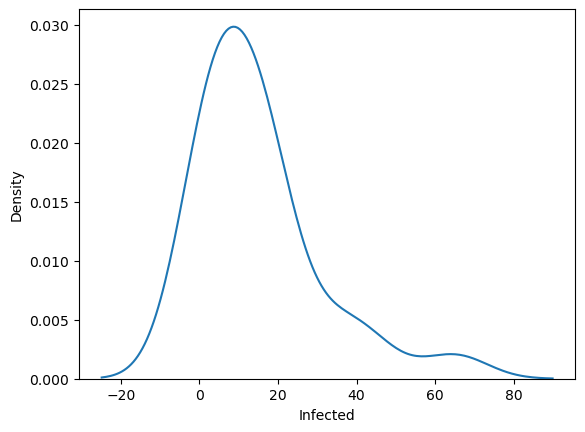

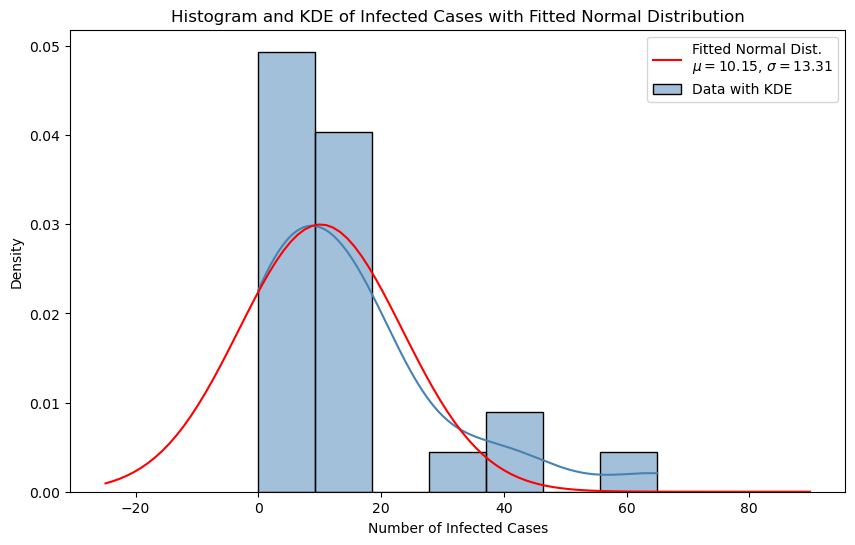

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from scipy.stats import norm
import os

# Set the directory for saving images
output_dir = "images"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Assuming 'data' is your DataFrame containing the 'Infected' column
total_infected_by_year = data


# Step 1: Define the normal distribution function
def normal_distribution(x, mean, std_dev):
    return norm.pdf(x, mean, std_dev)


# Step 2: Prepare data for curve fitting
# KDE (Kernel Density Estimation) values from Seaborn
kde = (
    sns.kdeplot(total_infected_by_year["Infected"], bw_adjust=1)
    .get_lines()[0]
    .get_data()
)
x_data, y_data = kde

# Step 3: Initial guess for the parameters [mean, std_dev]
initial_guess = [
    np.mean(total_infected_by_year["Infected"]),
    np.std(total_infected_by_year["Infected"]),
]

# Step 4: Fit the normal distribution to the KDE curve
params, _ = curve_fit(normal_distribution, x_data, y_data, p0=initial_guess)

# Extracting the optimized mean and standard deviation
fitted_mean, fitted_std_dev = params
print(
    f"Fitted Mean: {fitted_mean:.2f}, Fitted Standard Deviation: {fitted_std_dev:.2f}"
)

# Step 5: Plotting the KDE and Fitted Normal Distribution
plt.figure(figsize=(10, 6))
sns.histplot(
    total_infected_by_year["Infected"],
    kde=True,
    color="steelblue",
    stat="density",
    label="Data with KDE",
)
x = np.linspace(min(x_data), max(x_data), 100)
plt.plot(
    x,
    normal_distribution(x, fitted_mean, fitted_std_dev),
    "r-",
    label=f"Fitted Normal Dist. \n$\mu={fitted_mean:.2f}$, $\sigma={fitted_std_dev:.2f}$",
)
plt.title("Histogram and KDE of Infected Cases with Fitted Normal Distribution")
plt.xlabel("Number of Infected Cases")
plt.ylabel("Density")
plt.legend()

# Save the plot
output_path = os.path.join(
    output_dir, "histogram_kde_fitted_normal_distribution_infected.eps"
)
plt.savefig(output_path, dpi=220, format="eps")

output_path = os.path.join(
    output_dir, "histogram_kde_fitted_normal_distribution_infected.png"
)
plt.savefig(output_path, dpi=220, format="png")

# Display the plot
plt.show()

# Histogram of Death Cases

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Distribution Curve
Fitted Mean: 6.98, Fitted Standard Deviation: 9.93


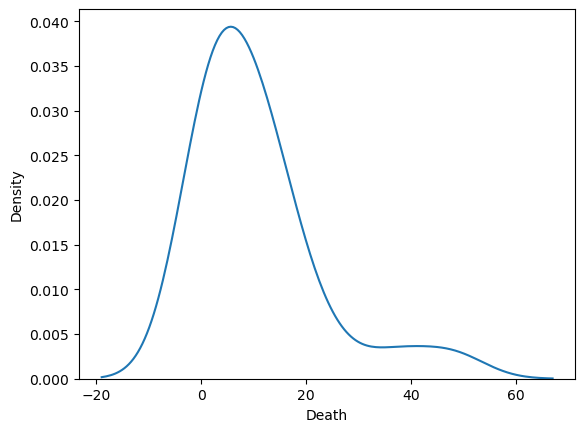

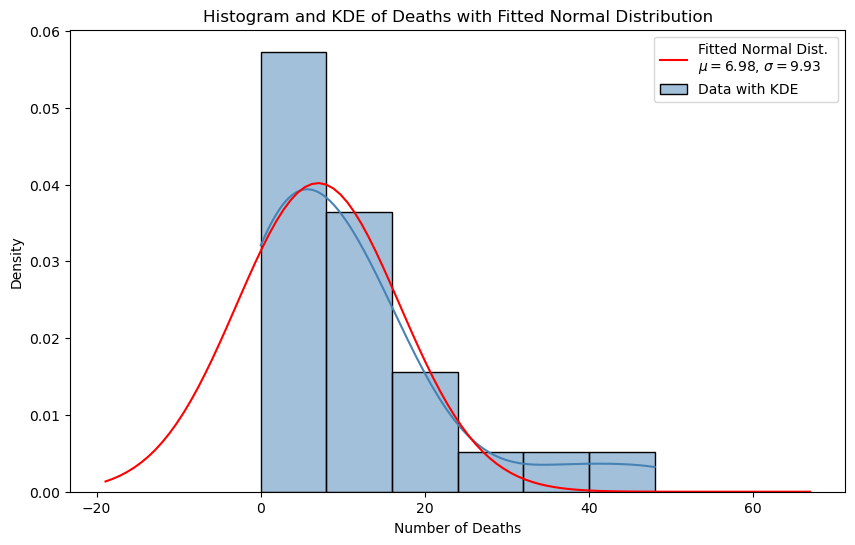

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from scipy.stats import norm
import os

# Set the directory for saving images
output_dir = "images"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

total_deaths_by_year = data


# Step 1: Define the normal distribution function
def normal_distribution(x, mean, std_dev):
    return norm.pdf(x, mean, std_dev)


# Step 2: Prepare data for curve fitting
# KDE (Kernel Density Estimation) values from Seaborn
kde = sns.kdeplot(total_deaths_by_year["Death"], bw_adjust=1).get_lines()[0].get_data()
x_data, y_data = kde

# Step 3: Initial guess for the parameters [mean, std_dev]
initial_guess = [
    np.mean(total_deaths_by_year["Death"]),
    np.std(total_deaths_by_year["Death"]),
]

# Step 4: Fit the normal distribution to the KDE curve
params, _ = curve_fit(normal_distribution, x_data, y_data, p0=initial_guess)
print("Distribution Curve")

# Extracting the optimized mean and standard deviation
fitted_mean, fitted_std_dev = params
print(
    f"Fitted Mean: {fitted_mean:.2f}, Fitted Standard Deviation: {fitted_std_dev:.2f}"
)

# Step 5: Plotting the KDE and Fitted Normal Distribution
plt.figure(figsize=(10, 6))
sns.histplot(
    total_deaths_by_year["Death"],
    kde=True,
    color="steelblue",
    stat="density",
    label="Data with KDE",
)
x = np.linspace(min(x_data), max(x_data), 100)
plt.plot(
    x,
    normal_distribution(x, fitted_mean, fitted_std_dev),
    "r-",
    label=f"Fitted Normal Dist. \n$\mu={fitted_mean:.2f}$, $\sigma={fitted_std_dev:.2f}$",
)
plt.title("Histogram and KDE of Deaths with Fitted Normal Distribution")
plt.xlabel("Number of Deaths")  # Adjust the label according to your data
plt.ylabel("Density")
plt.legend()

# Save the plot
output_path = os.path.join(
    output_dir, "histogram_kde_fitted_normal_distribution_death.eps"
)
plt.savefig(output_path, dpi=220, format="eps")

output_path = os.path.join(
    output_dir, "histogram_kde_fitted_normal_distribution_death.png"
)
plt.savefig(output_path, dpi=220, format="png")

# Display the plot
plt.show()

# Normalized Explanatory Variables

In [11]:
normalized_data = data[
    [
        "Max_T",
        "Min_T",
        "Dry-Bulb T",
        "Rainfall",
        "Humidity",
        "Avg_Precipitation",
        "Avg_Population",
        "Avg_Urban",
        "Avg_Rural",
    ]
]
normalized_data = (normalized_data - normalized_data.mean()) / normalized_data.std()

# Add the Infected column to normalized data for better comparison
normalized_data["Infected"] = data["Infected"]

# Add the Death column to normalized data for better comparison
normalized_data["Death"] = data["Death"]

# Display the normalized data
normalized_data.head().reset_index(drop=True)

KeyError: "['Max_T', 'Min_T', 'Avg_Precipitation', 'Avg_Population', 'Avg_Urban', 'Avg_Rural'] not in index"

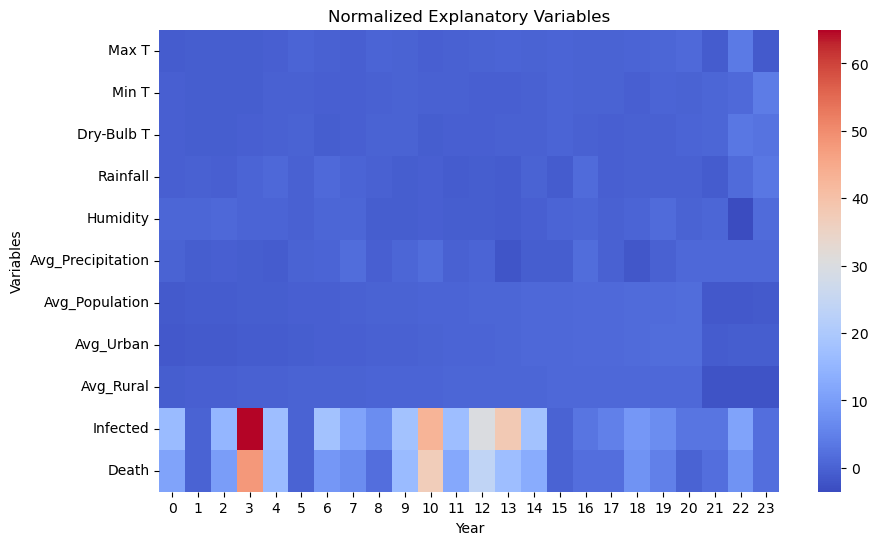

In [9]:
# Plot the normalized explanatory variables without annotation numbers
plt.figure(figsize=(10, 6))
sns.heatmap(normalized_data.T, cmap="coolwarm", annot=False, cbar=True)
plt.title("Normalized Explanatory Variables")
plt.xlabel("Year")
plt.ylabel("Variables")

# Save the plot
output_path = os.path.join(output_dir, "normalized_explanatory_variables.eps")
plt.savefig(output_path, dpi=220, format="eps")

output_path = os.path.join(output_dir, "normalized_explanatory_variables.png")
plt.savefig(output_path, dpi=220, format="png")

# Display the plot
plt.show()

### Insights and Summary from the Plot
1. **General Overview**:
   - The heatmap displays the normalized values of various explanatory variables (Max Temperature, Min Temperature, Dry-Bulb Temperature, Rainfall, Humidity, Avg_Precipitation, Avg_Population, Avg_Urban, Avg_Rural) over the years, along with the number of infections (Infected) and deaths (Death) for comparison.
   - The color scale ranges from deep blue (below average) to deep red (above average), indicating how each variable deviates from its mean across the observed years.

2. **Temperature-Related Variables** (`Max T`, `Min T`, `Dry-Bulb T`):
   - The heatmap shows clusters of high (red) and low (blue) values for temperature-related variables.
   - **High Temperature Clusters**: Certain years show above-average maximum and minimum temperatures, suggesting possible correlation periods when temperatures were significantly higher.
   - **Low Temperature Clusters**: There are periods with below-average temperature values, which can indicate relatively cooler years.

3. **Rainfall**:
   - Significant variation is visible, with some years showing high rainfall (deep red) and others showing below-average rainfall (deep blue).
   - **High Rainfall**: Correlation with 'Infected' and 'Death' values can be checked to see if higher rainfall correlates with a higher number of infections or deaths in certain years.
   - **Low Rainfall**: Similarly, years with low rainfall should be analyzed for their impact on infection and death rates.

4. **Humidity**:
   - The variability in humidity is apparent, with a mix of high and low values throughout the period.
   - **Higher Humidity**: It is important to note if higher humidity correlates with infection or death spikes.
   - **Lower Humidity**: Years with lower humidity values may show a distinct pattern in infection and death rates.

5. **Infected and Death**:
   - The ‘Infected’ and 'Death' rows in the heatmap provide a comparison of infection and death numbers with respect to normalized explanatory variables.
   - **Correlation Patterns**:
     - Years with high infection and death rates (red) can be visually compared to the patterns in explanatory variables to detect possible relationships, such as high rainfall or temperature anomalies leading to increased infections and deaths.
     - Years with low infection and death rates (blue) might indicate more favorable conditions or effective control measures.

6. **Patterns and Anomalies**:
   - **Cluster Patterns**: The presence of clusters of red or blue cells across multiple variables for the same years indicates potential environmental or climatic anomalies.
   - **Anomalies**: Single red or blue cells that stand out in a largely uniform row suggest unusual deviations for that particular variable in a specific year.

### Summary:
- **Overall Variability**: The heatmap illustrates significant variability in explanatory variables over the years. It is crucial to analyze these variations concerning the number of infected cases and deaths to understand their impact.
- **Potential Correlations**: Visual correlations can be observed, such as years with high rainfall or extreme temperature values corresponding to increased infection and death rates. These patterns warrant further statistical analysis to confirm their significance.
- **Next Steps**:
  - Perform correlation analysis to quantitatively assess relationships between each explanatory variable and the number of infected cases and deaths.
  - Conduct time series analysis to identify trends and seasonality in infections and deaths related to climatic changes.
  - Explore more complex models like regression or machine learning to predict infection and death rates based on these variables.


# Correlation Analysis

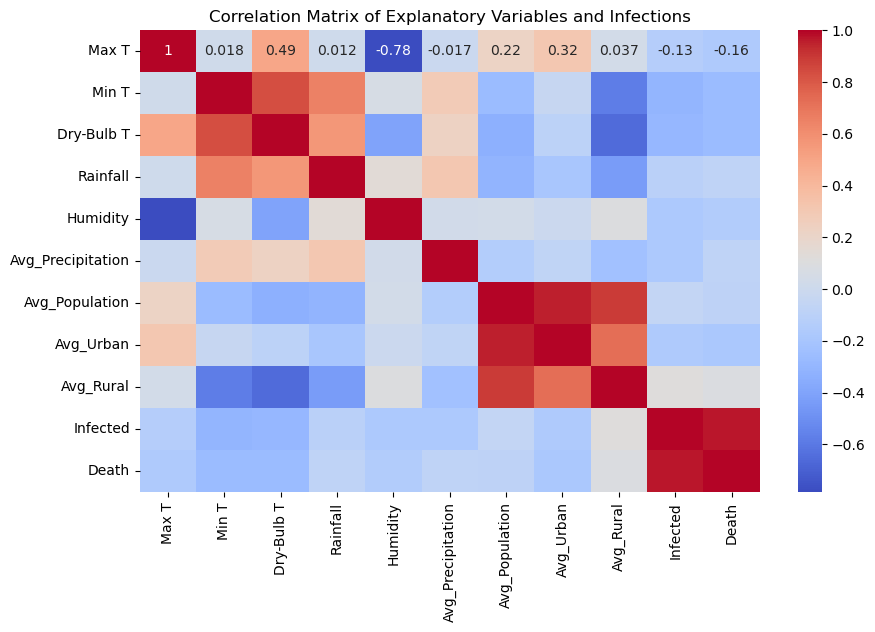

In [10]:
# Step 1: Calculate the correlation matrix
correlation_matrix = normalized_data.corr()

# Step 2: Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Explanatory Variables and Infections")

# Save the plot
output_path = os.path.join(output_dir, "correlation_matrix.eps")
plt.savefig(output_path, dpi=220, format="eps")

output_path = os.path.join(output_dir, "correlation_matrix.png")
plt.savefig(output_path, dpi=220, format="png")

# Display the plot
plt.show()

# # Step 3: Display the correlation with 'Infected' column
# infected_correlation = correlation_matrix['Infected'].sort_values(ascending=False)
# print("Correlation of variables with 'Infected':")
# print(infected_correlation)

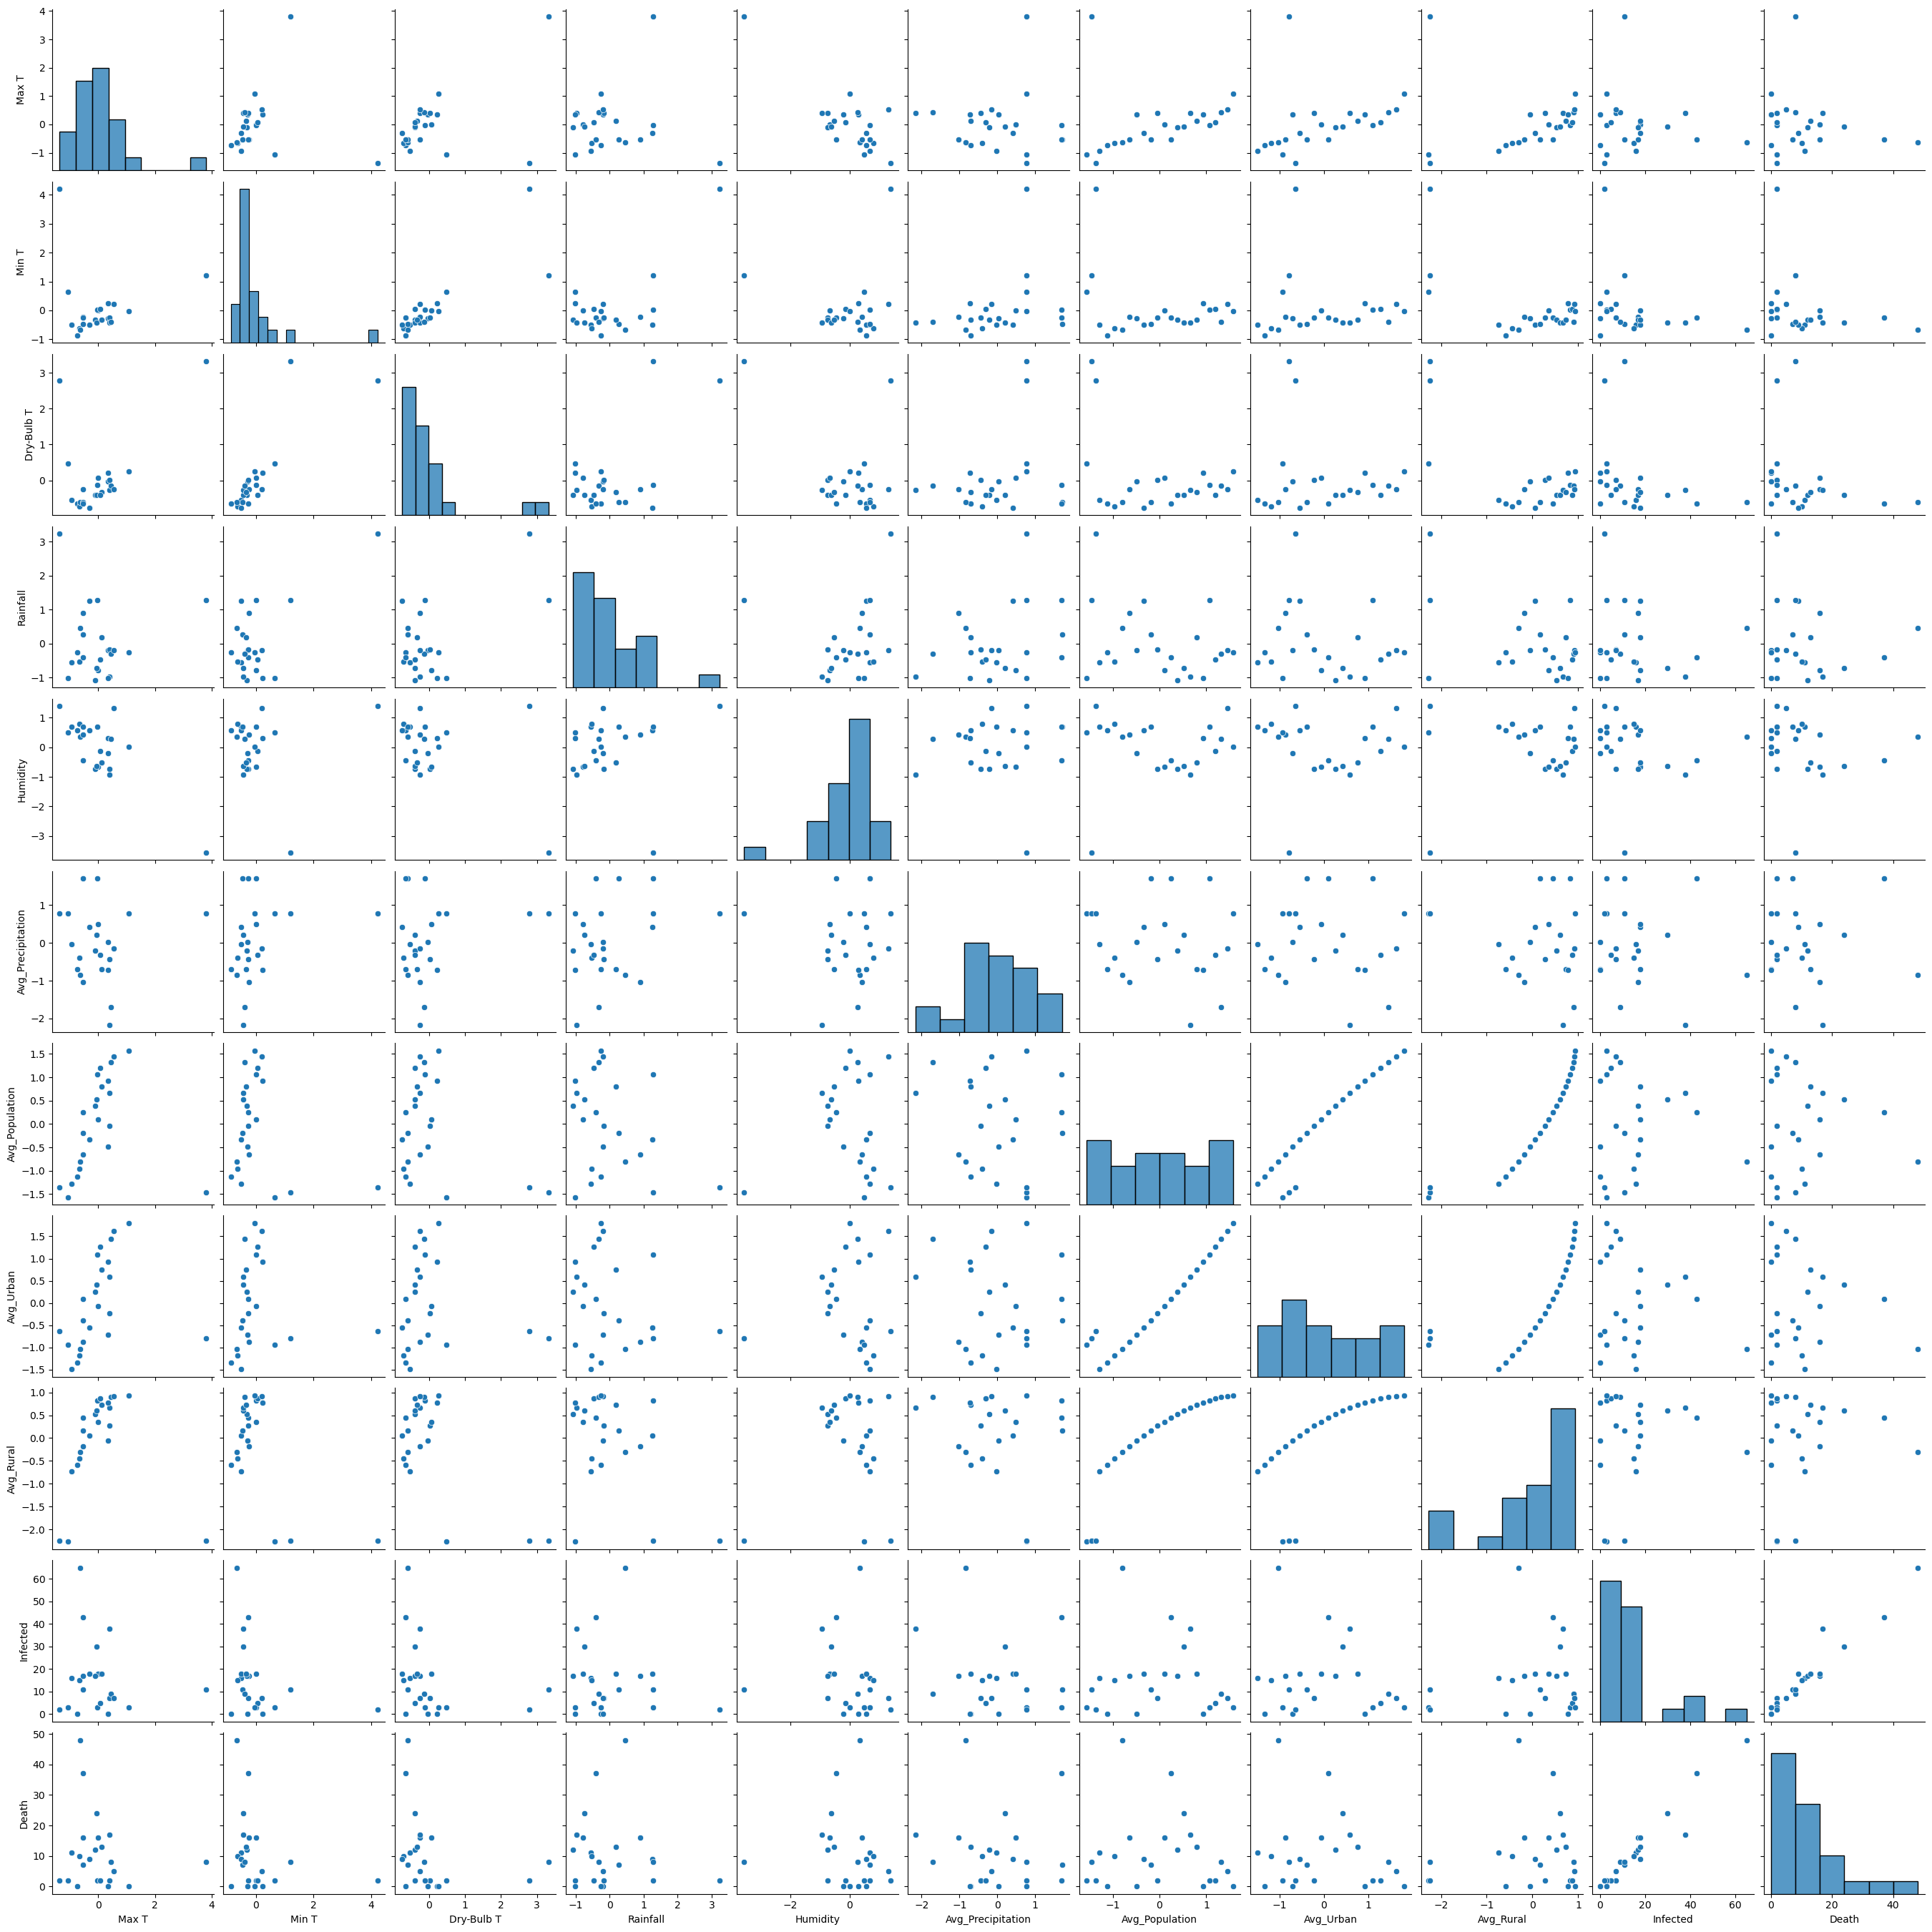

In [11]:
import seaborn as sns

sns.pairplot(normalized_data)
plt.show()

# Insights from the Heatmap for Correlation Analysis

## Introduction
A heatmap is a graphical representation of data where individual values are represented as colors. In the context of correlation analysis, a heatmap is used to visualize the correlation matrix of a dataset, where each cell in the matrix shows the correlation between two variables.

## Understanding the Heatmap
- **Color Gradient**: The colors in the heatmap represent the strength and direction of the correlation. Typically, a color gradient from blue to red is used, where:
  - **Blue** indicates a strong negative correlation (-1).
  - **Red** indicates a strong positive correlation (+1).
  - **White** or neutral colors indicate no correlation (0).

- **Correlation Coefficient**: The value in each cell represents the correlation coefficient between the two variables. This coefficient ranges from -1 to +1:
  - **+1**: Perfect positive correlation. As one variable increases, the other variable also increases.
  - **-1**: Perfect negative correlation. As one variable increases, the other variable decreases.
  - **0**: No correlation. The variables do not have any linear relationship.

## Key Insights
1. **Strong Positive Correlations**:
   - Cells with dark red colors indicate pairs of variables that have a strong positive correlation. This means that as one variable increases, the other variable tends to increase as well.
   - Example: If `Variable A` and `Variable B` have a correlation coefficient of 0.85, they are strongly positively correlated.

2. **Strong Negative Correlations**:
   - Cells with dark blue colors indicate pairs of variables that have a strong negative correlation. This means that as one variable increases, the other variable tends to decrease.
   - Example: If `Variable C` and `Variable D` have a correlation coefficient of -0.75, they are strongly negatively correlated.

3. **No Correlation**:
   - Cells with white or neutral colors indicate pairs of variables that have little to no correlation. This means that changes in one variable do not predict changes in the other variable.
   - Example: If `Variable E` and `Variable F` have a correlation coefficient close to 0, they are not correlated.

4. **Identifying Patterns**:
   - By examining the heatmap, you can quickly identify clusters of variables that are highly correlated with each other. This can be useful for feature selection, dimensionality reduction, and understanding the underlying structure of the data.

## Conclusion
Heatmaps are powerful tools for visualizing the correlation between variables in a dataset. By interpreting the colors and correlation coefficients, you can gain valuable insights into the relationships between variables, which can inform further analysis and decision-making in your project.

# Significance of Correlation Coefficients

In [12]:
from scipy.stats import pearsonr


# Function to calculate the correlation coefficient and p-value for each pair of variables
def correlation_significance(df):
    cols = df.columns
    correlation_pvalues = pd.DataFrame(index=cols, columns=cols)

    for i in cols:
        for j in cols:
            if i == j:
                correlation_pvalues[i][j] = 0  # Diagonal values are always 0
            else:
                corr, pval = pearsonr(df[i], df[j])
                correlation_pvalues[i][j] = pval

    return correlation_pvalues


# Calculate the correlation coefficients
correlation_matrix = normalized_data.corr()

# Calculate p-values for the correlations
correlation_pvalues = correlation_significance(normalized_data)

# Display correlation matrix and p-values
print("Correlation Coefficients:")
correlation_matrix

Correlation Coefficients:


,Max T,Min T,Dry-Bulb T,Rainfall,Humidity,Avg_Precipitation,Avg_Population,Avg_Urban,Avg_Rural,Infected,Death
Max T,1.000000,0.018370,0.492515,0.011684,-0.784965,-0.017270,0.222047,0.315587,0.036809,-0.130991,-0.163584
Min T,0.018370,1.000000,0.833918,0.657515,0.059865,0.286322,-0.265325,-0.033410,-0.581879,-0.306181,-0.268341
Dry-Bulb T,0.492515,0.833918,1.000000,0.566663,-0.403810,0.227393,-0.336360,-0.093422,-0.657739,-0.293232,-0.268655
Rainfall,0.011684,0.657515,0.566663,1.000000,0.137484,0.314411,-0.313600,-0.198937,-0.438200,-0.104667,-0.076119
Humidity,-0.784965,0.059865,-0.403810,0.137484,1.000000,0.028327,0.034123,-0.010210,0.097538,-0.175495,-0.148589
Avg_Precipitation,-0.017270,0.286322,0.227393,0.314411,0.028327,1.000000,-0.140711,-0.067355,-0.230905,-0.175421,-0.076014
Avg_Population,0.222047,-0.265325,-0.336360,-0.313600,0.034123,-0.140711,1.000000,0.957328,0.891860,-0.054760,-0.082202
Avg_Urban,0.315587,-0.033410,-0.093422,-0.198937,-0.010210,-0.067355,0.957328,1.000000,0.723084,-0.159648,-0.182257
Avg_Rural,0.036809,-0.581879,-0.657739,-0.438200,0.097538,-0.230905,0.891860,0.723084,1.000000,0.118977,0.088772
Infected,-0.130991,-0.306181,-0.293232,-0.104667,-0.175495,-0.175421,-0.054760,-0.159648,0.118977,1.000000,0.967511


# Insights from Correlation Coefficients

## Introduction
Correlation coefficients measure the strength and direction of the linear relationship between two variables. The values range from -1 to 1, where:
- **1** indicates a perfect positive linear relationship.
- **-1** indicates a perfect negative linear relationship.
- **0** indicates no linear relationship.

## Key Insights

### Strong Positive Correlations
- **Infected and Death (0.967511)**: There is a very strong positive correlation between the number of infected cases and deaths. This suggests that as the number of infections increases, the number of deaths also increases proportionally.
- **Avg_Population and Avg_Urban (0.957328)**: A strong positive correlation indicates that as the average population increases, the average urban population also increases significantly.

### Strong Negative Correlations
- **Max T and Humidity (-0.784965)**: There is a strong negative correlation between maximum temperature and humidity. This suggests that higher temperatures are associated with lower humidity levels.
- **Min T and Avg_Rural (-0.581879)**: A strong negative correlation indicates that higher minimum temperatures are associated with a decrease in the average rural population.

### Moderate Correlations
- **Min T and Dry-Bulb T (0.833918)**: There is a strong positive correlation between minimum temperature and dry-bulb temperature, indicating that these two temperature measures tend to increase together.
- **Rainfall and Min T (0.657515)**: A moderate positive correlation suggests that higher rainfall is associated with higher minimum temperatures.
- **Dry-Bulb T and Avg_Rural (-0.657739)**: A moderate negative correlation indicates that higher dry-bulb temperatures are associated with a decrease in the average rural population.

### Weak Correlations
- **Infected and Avg_Rural (0.118977)**: There is a weak positive correlation between the number of infected cases and the average rural population, suggesting a slight tendency for infections to increase with the rural population.
- **Death and Avg_Rural (0.088772)**: Similarly, there is a weak positive correlation between the number of deaths and the average rural population.

### No Significant Correlations
- **Avg_Precipitation and Infected (-0.175421)**: There is no significant correlation between average precipitation and the number of infected cases, indicating that precipitation does not have a strong linear relationship with infection rates.
- **Avg_Precipitation and Death (-0.076014)**: Similarly, there is no significant correlation between average precipitation and the number of deaths.

## Conclusion
The correlation analysis provides valuable insights into the relationships between various climatic and demographic variables and the number of infected cases and deaths. The strong positive correlation between infections and deaths highlights the severity of outbreaks. The negative correlations between temperature and humidity, as well as temperature and rural population, suggest potential climatic influences on population distribution and health outcomes. However, some variables, such as average precipitation, do not show significant linear relationships with infection or death rates, indicating the need for further analysis to understand their impact.

These insights can guide further statistical analysis and modeling efforts to predict and mitigate the impact of climatic and demographic factors on infection and death rates.

In [13]:
print("\nP-values:")
correlation_pvalues


P-values:


,Max T,Min T,Dry-Bulb T,Rainfall,Humidity,Avg_Precipitation,Avg_Population,Avg_Urban,Avg_Rural,Infected,Death
Max T,0,0.932104,0.014485,0.956787,0.000006,0.93616,0.29703,0.133042,0.864413,0.541793,0.444997
Min T,0.932104,0,0.0,0.00048,0.781114,0.17497,0.210191,0.876837,0.002856,0.145638,0.204861
Dry-Bulb T,0.014485,0.0,0,0.003888,0.050358,0.285248,0.108036,0.664148,0.000478,0.164334,0.20431
Rainfall,0.956787,0.00048,0.003888,0,0.521765,0.134572,0.135635,0.351378,0.03221,0.626452,0.723705
Humidity,0.000006,0.781114,0.050358,0.521765,0,0.895468,0.874229,0.962236,0.650253,0.412077,0.488349
Avg_Precipitation,0.93616,0.17497,0.285248,0.134572,0.895468,0,0.511943,0.754502,0.277671,0.412276,0.724073
Avg_Population,0.29703,0.210191,0.108036,0.135635,0.874229,0.511943,0,0.0,0.0,0.79939,0.70257
Avg_Urban,0.133042,0.876837,0.664148,0.351378,0.962236,0.754502,0.0,0,0.000066,0.456176,0.394002
Avg_Rural,0.864413,0.002856,0.000478,0.03221,0.650253,0.277671,0.0,0.000066,0,0.57977,0.679977
Infected,0.541793,0.145638,0.164334,0.626452,0.412077,0.412276,0.79939,0.456176,0.57977,0,0.0


# Number of Infected vs Number of Deaths over 2001-2024

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


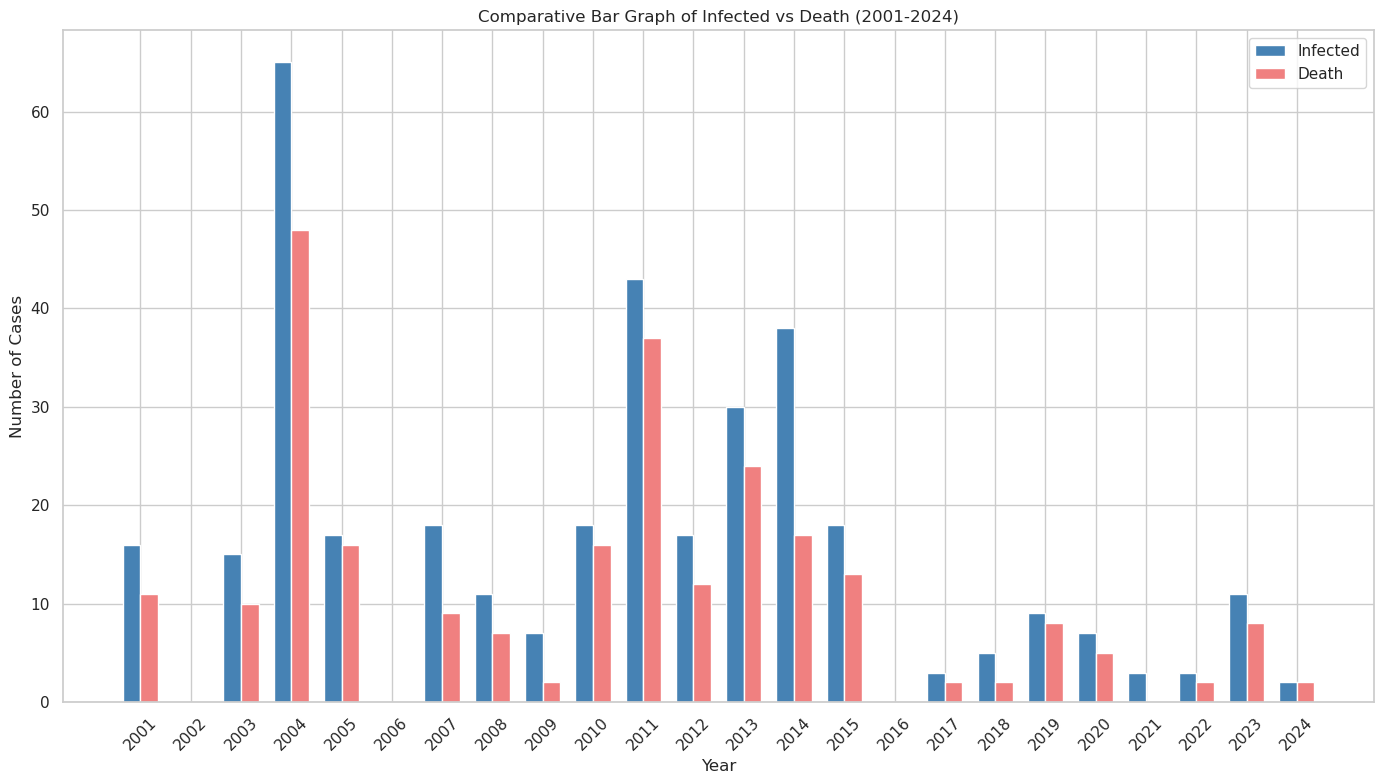

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Provided data for Infected and Death cases
data = {
    "Year": list(range(2001, 2025)),
    "Infected": [
        16,
        0,
        15,
        65,
        17,
        0,
        18,
        11,
        7,
        18,
        43,
        17,
        30,
        38,
        18,
        0,
        3,
        5,
        9,
        7,
        3,
        3,
        11,
        2,
    ],
    "Death": [
        11,
        0,
        10,
        48,
        16,
        0,
        9,
        7,
        2,
        16,
        37,
        12,
        24,
        17,
        13,
        0,
        2,
        2,
        8,
        5,
        0,
        2,
        8,
        2,
    ],
}

# Create a DataFrame
nipah_data = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Create a bar plot for 'Infected' and 'Death'
bar_width = 0.35
index = np.arange(len(nipah_data["Year"]))  # Create index for the number of years

# Plot Infected cases
plt.bar(index, nipah_data["Infected"], bar_width, label="Infected", color="steelblue")

# Plot Death cases, shifted by bar_width to avoid overlap
plt.bar(
    index + bar_width, nipah_data["Death"], bar_width, label="Death", color="lightcoral"
)

# Adding labels and title
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.title("Comparative Bar Graph of Infected vs Death (2001-2024)")
plt.xticks(
    index + bar_width / 2, nipah_data["Year"], rotation=45
)  # Adjust x-axis ticks
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the plot
output_path = os.path.join(output_dir, "comparative_bar_graph.eps")
plt.savefig(output_path, dpi=220, format="eps")

output_path = os.path.join(output_dir, "comparative_bar_graph.png")
plt.savefig(output_path, dpi=220, format="png")

# Display the plot
plt.show()

# Visualizing the Time Series Data

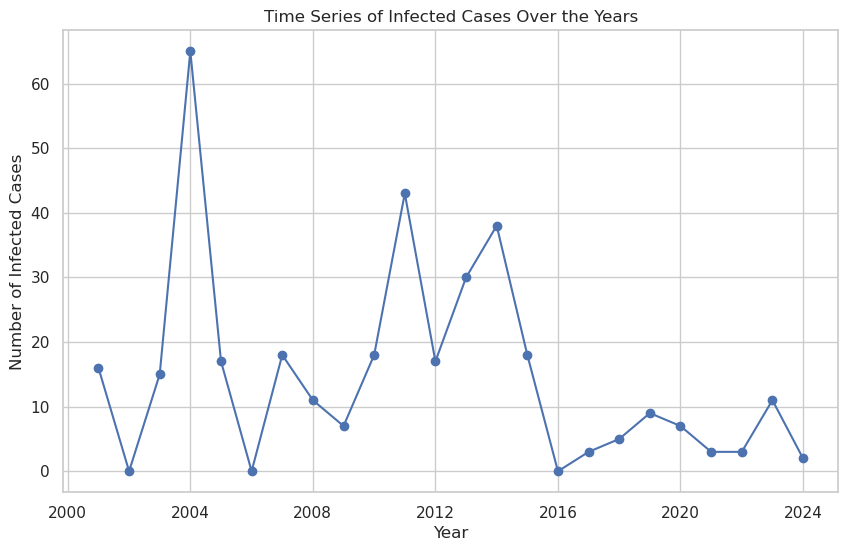

In [15]:
# Ensure data is a DataFrame
data = pd.DataFrame(data)

data["Year"] = pd.to_datetime(data["Year"], format="%Y")
data.set_index("Year", inplace=True)

# Plotting the time series
plt.figure(figsize=(10, 6))
plt.plot(data.index, data["Infected"], marker="o", linestyle="-")
plt.title("Time Series of Infected Cases Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Infected Cases")
plt.grid(True)

# Save the plot
output_path = os.path.join(output_dir, "time_series_infected_cases.eps")
plt.savefig(output_path, dpi=220, format="eps")

output_path = os.path.join(output_dir, "time_series_infected_cases.png")
plt.savefig(output_path, dpi=220, format="png")

# Display the plot
plt.show()

# Seasonal Decomposition

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


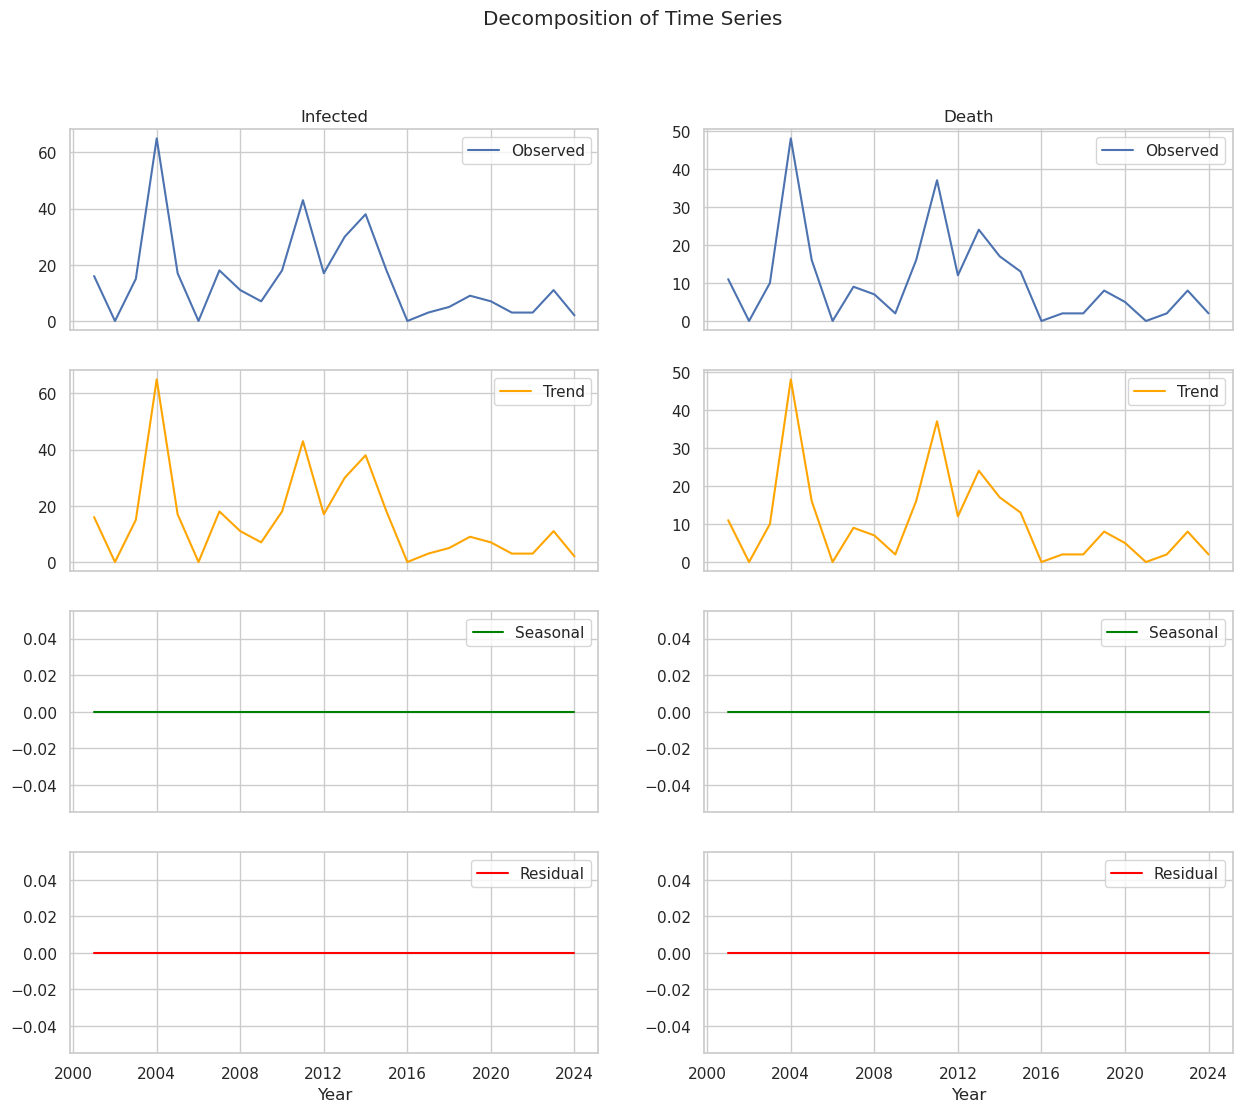

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series for 'Infected'
decomposition_infected = seasonal_decompose(
    data["Infected"], model="additive", period=1
)

# Decompose the time series for 'Death'
decomposition_death = seasonal_decompose(data["Death"], model="additive", period=1)

# Plotting the decomposition for 'Infected'
fig, axes = plt.subplots(4, 2, figsize=(15, 12), sharex=True)
axes[0, 0].plot(decomposition_infected.observed, label="Observed")
axes[0, 0].legend(loc="upper right")
axes[1, 0].plot(decomposition_infected.trend, label="Trend", color="orange")
axes[1, 0].legend(loc="upper right")
axes[2, 0].plot(decomposition_infected.seasonal, label="Seasonal", color="green")
axes[2, 0].legend(loc="upper right")
axes[3, 0].plot(decomposition_infected.resid, label="Residual", color="red")
axes[3, 0].legend(loc="upper right")
axes[3, 0].set_xlabel("Year")
axes[0, 0].set_title("Infected")

# Plotting the decomposition for 'Death'
axes[0, 1].plot(decomposition_death.observed, label="Observed")
axes[0, 1].legend(loc="upper right")
axes[1, 1].plot(decomposition_death.trend, label="Trend", color="orange")
axes[1, 1].legend(loc="upper right")
axes[2, 1].plot(decomposition_death.seasonal, label="Seasonal", color="green")
axes[2, 1].legend(loc="upper right")
axes[3, 1].plot(decomposition_death.resid, label="Residual", color="red")
axes[3, 1].legend(loc="upper right")
axes[3, 1].set_xlabel("Year")
axes[0, 1].set_title("Death")

plt.suptitle("Decomposition of Time Series")

# Save the plot
output_path = os.path.join(output_dir, "time_series_decomposition_infected_death.eps")
plt.savefig(output_path, dpi=220, format="eps")

output_path = os.path.join(output_dir, "time_series_decomposition_infected_death.png")
plt.savefig(output_path, dpi=220, format="png")

# Display the plot
plt.show()

# Stationarity Test

In [17]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test for 'Infected'
print("Augmented Dickey-Fuller Test for Infected:\n")
result = adfuller(data["Infected"].dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])
if result[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")

print("\n")
# Perform Augmented Dickey-Fuller test for 'Death'
print("Augmented Dickey-Fuller Test for Death:\n")
result = adfuller(data["Death"].dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])
if result[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")

Augmented Dickey-Fuller Test for Infected:

ADF Statistic: -3.5426638086313584
p-value: 0.0069566654130017325
The time series is stationary.


Augmented Dickey-Fuller Test for Death:

ADF Statistic: -3.4981386309051548
p-value: 0.00803502684194448
The time series is stationary.


# Trend Analysis

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


 Year  Infected  Death
 2001        16     11
 2002         0      0
 2003        15     10
 2004        65     48
 2005        17     16


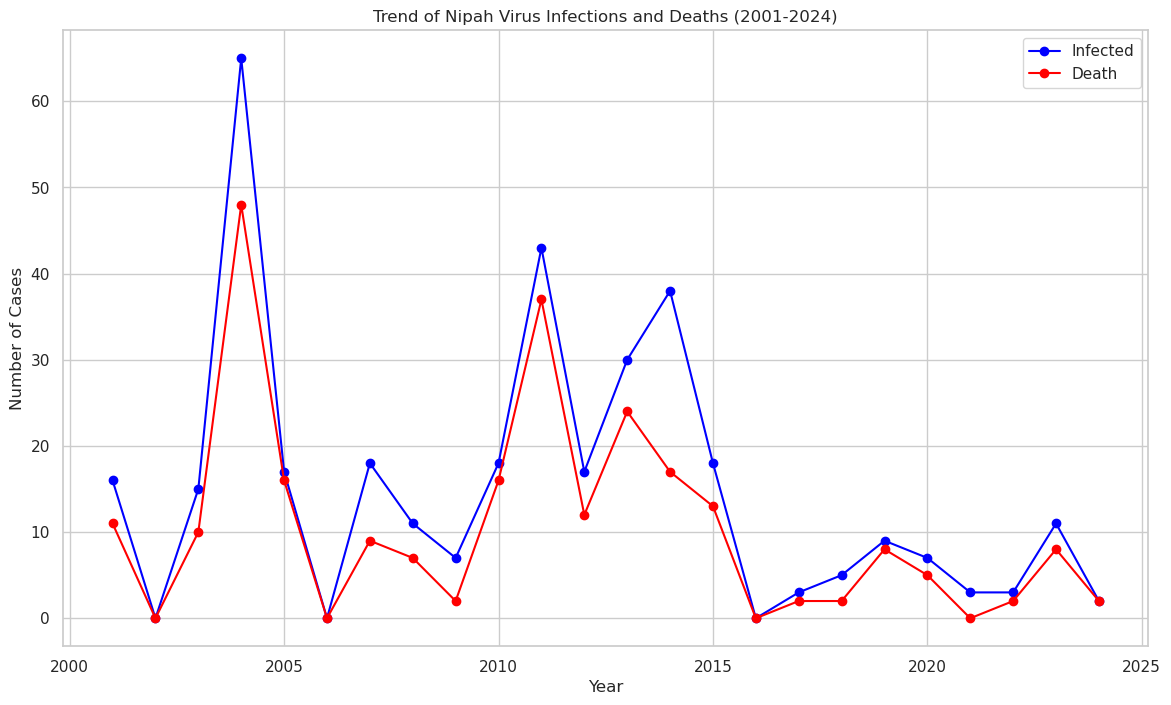

In [18]:
# Assuming 'nipah_data' is your DataFrame containing 'Infected' and 'Death' columns
nipah_data = df.copy()  # Define nipah_data by copying the existing DataFrame df

# Step 1: Create or Verify the Year Column
# If the 'Year' column is missing, we add it. Ensure that the data is for the years 2001 to 2024.
# Create a year range if not present
if "Year" not in nipah_data.columns:
    nipah_data["Year"] = list(range(2001, 2001 + len(nipah_data)))

# Verify that the DataFrame has 2001-2024 in the 'Year' column
print(nipah_data[["Year", "Infected", "Death"]].head().to_string(index=False))

# Step 2: Plotting the Trend of Infections and Deaths
plt.figure(figsize=(14, 8))

# Plotting Infected and Death trends over time
plt.plot(
    nipah_data["Year"],
    nipah_data["Infected"],
    marker="o",
    label="Infected",
    color="blue",
)
plt.plot(
    nipah_data["Year"], nipah_data["Death"], marker="o", label="Death", color="red"
)

# Adding labels and title
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.title("Trend of Nipah Virus Infections and Deaths (2001-2024)")
plt.legend()
plt.grid(True)

# Save the plot
output_path = os.path.join(output_dir, "trend_infections_deaths.eps")
plt.savefig(output_path, dpi=220, format="eps")

output_path = os.path.join(output_dir, "trend_infections_deaths.png")
plt.savefig(output_path, dpi=220, format="png")

# Display the plot
plt.show()

# Trend Analysis with Smoothing Techniques

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


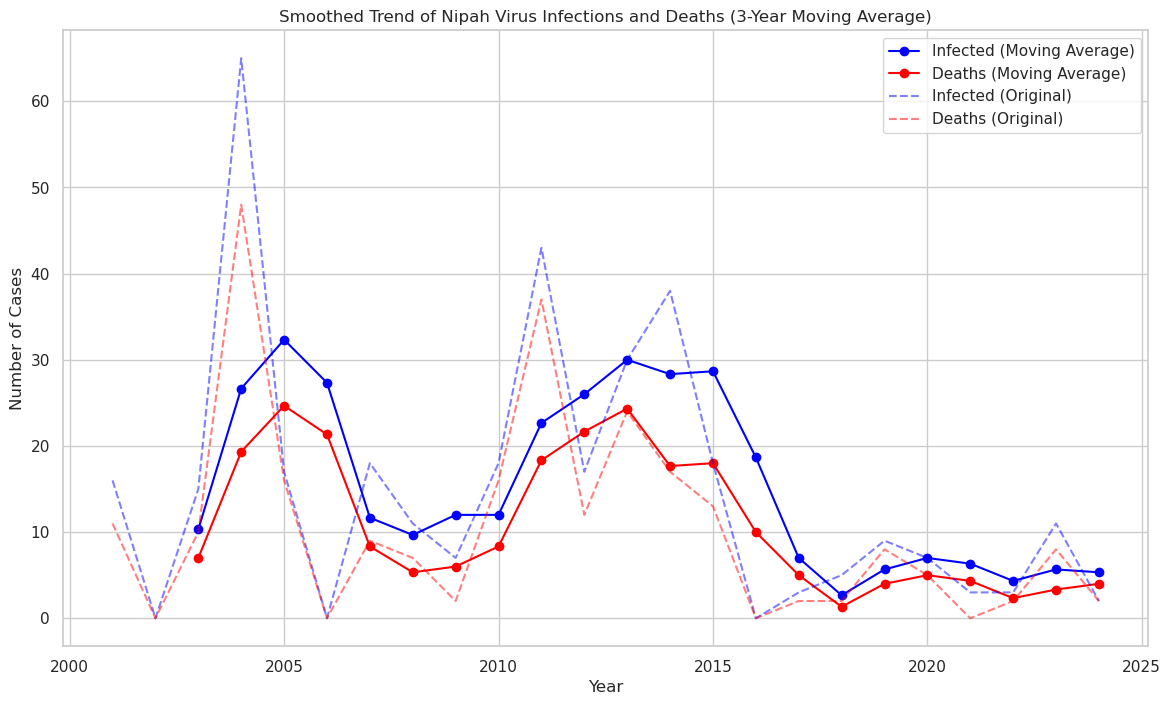

In [19]:
# Applying Moving Average Smoothing
nipah_data["Infected_MA"] = nipah_data["Infected"].rolling(window=3).mean()
nipah_data["Deaths_MA"] = nipah_data["Death"].rolling(window=3).mean()

# Plotting the smoothed trends
plt.figure(figsize=(14, 8))
plt.plot(
    nipah_data["Year"],
    nipah_data["Infected_MA"],
    label="Infected (Moving Average)",
    marker="o",
    color="blue",
)
plt.plot(
    nipah_data["Year"],
    nipah_data["Deaths_MA"],
    label="Deaths (Moving Average)",
    marker="o",
    color="red",
)
plt.plot(
    nipah_data["Year"],
    nipah_data["Infected"],
    linestyle="--",
    color="blue",
    alpha=0.5,
    label="Infected (Original)",
)
plt.plot(
    nipah_data["Year"],
    nipah_data["Death"],
    linestyle="--",
    color="red",
    alpha=0.5,
    label="Deaths (Original)",
)

# Adding labels and title
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.title("Smoothed Trend of Nipah Virus Infections and Deaths (3-Year Moving Average)")
plt.legend()
plt.grid(True)

# Save the plot
output_path = os.path.join(output_dir, "smoothed_trend_infections_deaths.eps")
plt.savefig(output_path, dpi=220, format="eps")

output_path = os.path.join(output_dir, "smoothed_trend_infections_deaths.png")
plt.savefig(output_path, dpi=220, format="png")

# Display the plot
plt.show()